# Hesitation analysis nb
Nb for testing out somr functions and other stuff for hesitation analysis

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
from pythonlib.tools.stroketools import *
from drawmonkey.tools.utils import *
from drawmonkey.tools.preprocess import *
from pyvm.classes.videoclass import Videos
from pythonlib.tools.expttools import load_yaml_config
from pyvm.globals import BASEDIR
from drawmonkey.tools.handtrack import HandTrack, getTrialsCameraFrametimes
from pyvm.utils.directories import get_metadata
import matplotlib.pyplot as plt
from pythonlib.drawmodel.strokePlots import *
import pythonlib
import pickle
from pythonlib.tools.camtools import *


In [3]:
#Add data here as needed
decide_data_dict = {
    'diego1': ('Diego','230913_dirgrammardiego5d'),
    'diego2': ('Diego','231118_gramdiego1b'),
    'diego3': ('Diego','230726_dirgrammardiego2'),
    'pancho1': ('Pancho','231114_grampancho1'),
    'pancho2': ('Pancho','231116_grampancho1')
}

#Change key here ot chaneg what data being used in the plotting
key_to_use = 'pancho2'

animal = decide_data_dict[key_to_use][0]
name = decide_data_dict[key_to_use][1]
#Only work if 1 session
date = name.split('_')[0]
expt = name.split('_')[1]

### Load presaved data (old)

In [4]:
dat_dir = f'/home/danhan/freiwaldDrive/dhanuska/handtrack_processed/{animal}/{name}/processed_data.pkl'
with open(dat_dir,'rb') as f:
    dat_load = pickle.load(f)
#Only work if one session
fd = loadSingleDataQuick(animal,date,expt,1)

-- loaded presaved data: /home/danhan/freiwaldDrive/kgupta/macaque_data/Pancho/231116/231116_101721_grampancho1_Pancho_1.pkl


In [11]:
dat_trials = dat_load['220914_f12_dlc']
# dat_trials = dat_load['220914_flea_bfs1_dlc']

In [12]:
#Check skipped reaosns rq to make sure data looks fine
#Should mainly just be bc no beh'
print(set(d['skipped'] for d in dat_trials.values()))
print(len(dat_trials))

{None, 'no_beh_data_found'}
893


In [ ]:
#Make sure we have the  right keys for this df (mainly likelihood_min and strokes_cam_calc_onoff )
trial_check = 72
if 'strokes_cam_calc_onoff' in dat_trials[trial_check].keys() \
    and 'likelihood_min' in dat_trials[trial_check].keys():
    
    print('keys look good')
else:
    print('keys look bad, maybe old data extraction or empty trial')
    print(dat_trials[trial_check].keys())


keys look bad, maybe old data extraction or empty trial
dict_keys(['strokes_cam', 'gaps_cam', 'pts_time_cam_all', 'strokes_touch', 'strokes_task', 'pnut_strokes', 'strokes_raw_times', 'reg_strokes_cam', 'reg_gaps_cam', 'reg_pts_time_cam_all', 'trans_strokes_cam', 'trans_gaps_cam', 'trans_pts_time_cam_all', 'skipped'])


### Use preprocess_clean func to laod data on the fly

In [6]:
from drawmonkey.tools.ht_preprocess import preprocess_clean
from pythonlib.tools.stroketools import strokesInterpolate2

trange = range (200,220)
# dat_func = preprocess_clean(name,animal,True,trange=trange)
# dat_func = preprocess_clean(name,animal,True)
#Get upsampled shit
for coefs, d_coef in dat_load.items():
    for trial,d_trial in d_coef.items():
        if d_trial['skipped'] is None:
            cam_fs = 1/np.mean(np.diff(d_trial['trans_pts_time_cam_all']))
            dat_load[coefs][trial]['trans_pts_time_cam_all_int'] = strokesInterpolate2([d_trial['trans_pts_time_cam_all']],kind='linear',N=["fsnew",1000,cam_fs])[0]



In [7]:
from drawmonkey.tools.ht_preprocess import preprocess_merge
ht_dat = preprocess_merge(dat_load,'220914_f12_dlc')

In [8]:
ht_dat[210].keys()

dict_keys(['strokes_cam', 'gaps_cam', 'pts_time_cam_all', 'strokes_touch', 'strokes_task', 'strokes_raw_times', 'likelihood_min', 'reg_strokes_cam', 'reg_gaps_cam', 'reg_pts_time_cam_all', 'trans_strokes_cam', 'trans_gaps_cam', 'trans_pts_time_cam_all', 'onset_offset_times', 'strokes_cam_calc_onoff', 'gaps_cam_calc_onoff', 'skipped', 'trans_pts_time_cam_all_int', 'coefs_used'])

In [9]:
#Load in dataset
from pythonlib.dataset.dataset import load_dataset_notdaily_helper, load_dataset_daily_helper
from pythonlib.dataset.dataset_strokes import preprocess_dataset_to_datstrokes
from pythonlib.drawmodel.analysis import *
import seaborn as sns

D = load_dataset_daily_helper(animal, date)
D.trialcode_tuple_extract_assign()





Searching using this string:
/home/danhan/code/drawmonkey/drawmonkey/expt_metadat/*231116-*Pancho.**
Found this many paths:
0
Searching using this string:
/home/danhan/code/drawmonkey/drawmonkey/expt_metadat_daily/*231116-*Pancho.**
Found this many paths:
1
---
/home/danhan/code/drawmonkey/drawmonkey/expt_metadat_daily/grampancho1-231116-Pancho.yaml
Loading this dataset Pancho grampancho1 231116
Searching using this string:
/home/danhan/freiwaldDrive/kgupta/analyses/database/*Pancho-*grampancho1-*231116-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
0
Searching using this string:
/home/danhan/freiwaldDrive/kgupta/analyses/database/BEH/*Pancho-*grampancho1-*231116-*/*dat*.pkl
-- Splitting off dir from fname
Found this many paths:
1
---
/home/danhan/freiwaldDrive/kgupta/analyses/database/BEH/Pancho-grampancho1-231116-231117_001511
----------------
Currently loading dataset pkl: /home/danhan/freiwaldDrive/kgupta/analyses/database/BEH/Pancho-grampancho1-231116-231117_00

/home/danhan/code/pythonlib/pythonlib/tools/pandastools.py:2594: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'IGN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column].isna(), column] = replace_with
/home/danhan/code/pythonlib/pythonlib/tools/pandastools.py:2594: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'IGN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column].isna(), column] = replace_with


Basis set of strokes: ['Lcentered-4-2-0', 'Lcentered-4-3-0', 'Lcentered-4-4-0', 'V-2-1-0', 'V-2-2-0', 'V-2-4-0', 'arcdeep-4-1-0', 'arcdeep-4-2-0', 'arcdeep-4-4-0', 'circle-6-1-0', 'line-8-1-0', 'line-8-2-0', 'line-8-3-0', 'line-8-4-0', 'squiggle3-3-1-0', 'squiggle3-3-2-0', 'squiggle3-3-2-1']
Deleting these columns with seqc in name: []
Appended columns gridsize!
SAVING at:  /home/danhan/freiwaldDrive/dhanuska/analyses/main/preprocess_general/Pancho_231116_grampancho1
0
100
200
300
400
500
600
700
This many strokes extracted:  2757
DONE!
Appended epoch to self.Dat
Appended character to self.Dat


/home/danhan/code/pythonlib/pythonlib/tools/pandastools.py:2594: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'IGN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column].isna(), column] = replace_with
/home/danhan/code/pythonlib/pythonlib/tools/pandastools.py:2594: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'IGN' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df.loc[df[column].isna(), column] = replace_with


In [10]:
D.Dat = mergeHTWithDataset(ht_dat,D)

In [ ]:
D.Dat

NameError: name 'D' is not defined

In [ ]:
#load eyetracking data
from neuralmonkey.classes.session import load_session_helper, load_mult_session_helper
import neuralmonkey.utils.monkeylogic as mkl
from neuralmonkey.scripts.load_and_save_locally import load_and_preprocess_single_session
from neuralmonkey.classes.session import Session

save_dir = f'/data4/dan/saved_ms/{date}.pkl'
if not os.path.exists(save_dir):
    MS = load_mult_session_helper(date, animal)
    with open(save_dir,'wb') as f:
        pickle.dump(MS,f)
else:
    with open(save_dir,'rb') as f:
        MS = pickle.load(f)


#### Plot trajectories

In [ ]:
for trial,dat in dat_trials.items():
    strokes_task = getTrialsTaskAsStrokes(fd,trial)
    strokes_monkey = getTrialsStrokesByPeanuts(fd,trial)
    if len(dat) == 0:
        continue
    if trial in range(100,110):
        plotTrialsTrajectories(fd,dat,trial)
        fig,ax = plt.subplots(1,2,figsize=[10,20],sharex=True,sharey=True)
        plotDatStrokes(strokes_task, ax[0], clean_task=True)
        plotDatStrokes(strokes_monkey,ax[1])
        ax[0].set_title(f'Beh {trial} : Vid {trial-1}')
        

        

#### Heat Map Plots

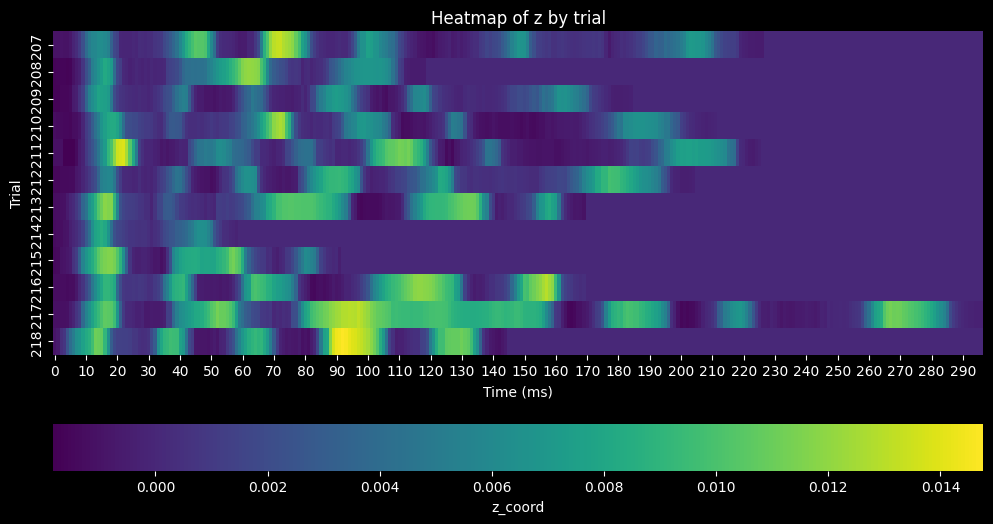

In [204]:
plotHeat(D.Dat, plot_trials = trange)

In [210]:
ht_dat[210].keys()

dict_keys(['strokes_cam', 'gaps_cam', 'pts_time_cam_all', 'strokes_touch', 'strokes_task', 'pnut_strokes', 'strokes_raw_times', 'likelihood_min', 'reg_strokes_cam', 'reg_gaps_cam', 'reg_pts_time_cam_all', 'trans_strokes_cam', 'trans_gaps_cam', 'trans_pts_time_cam_all', 'onset_offset_times', 'strokes_cam_calc_onoff', 'gaps_cam_calc_onoff', 'skipped', 'trans_pts_time_cam_all_int', 'coefs_used'])

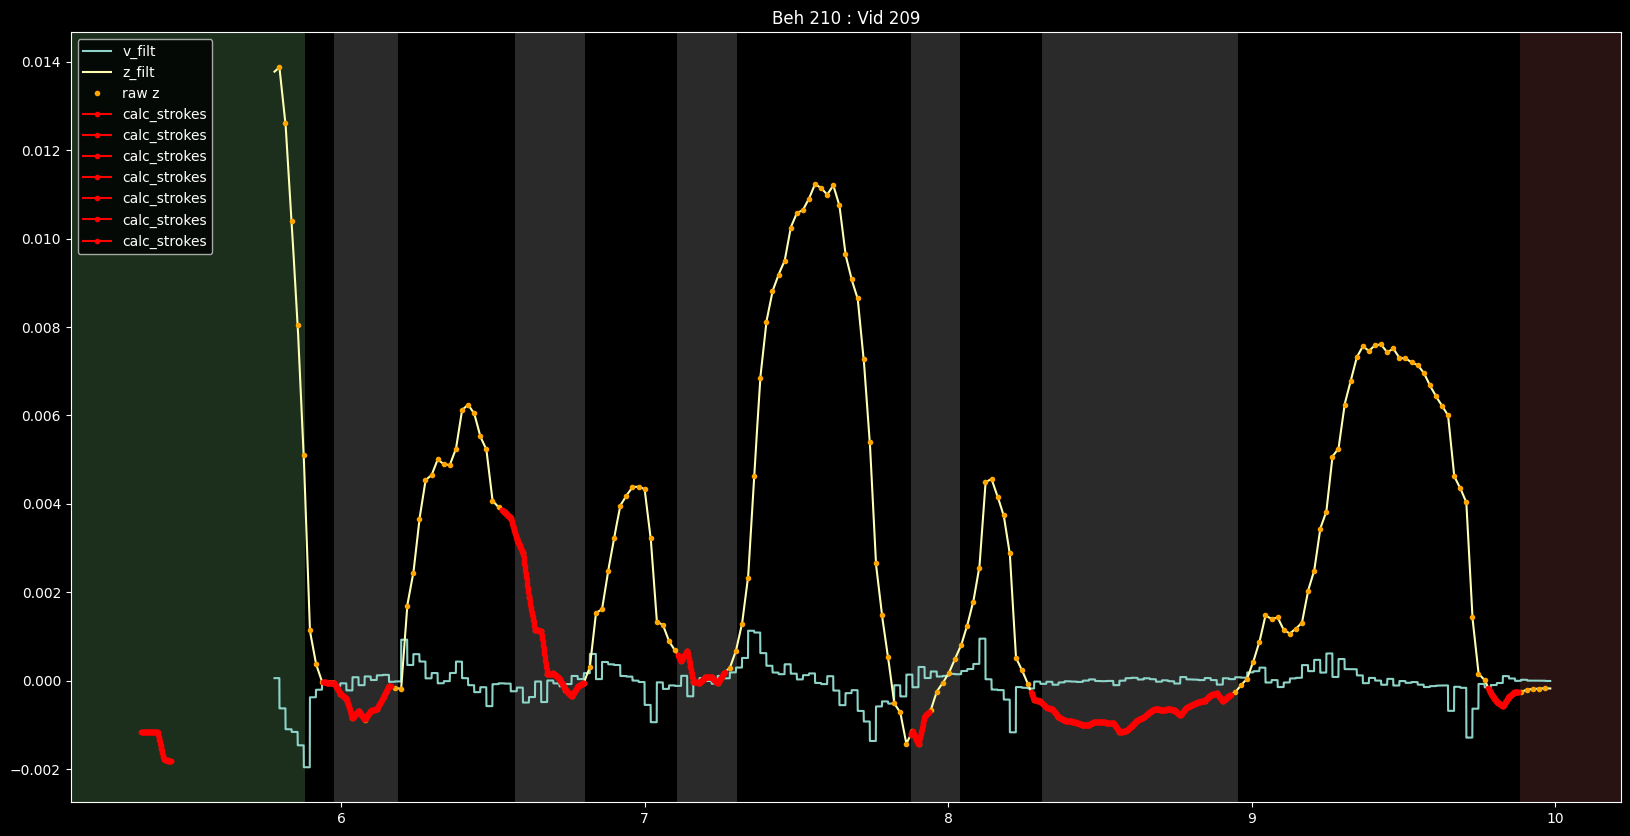

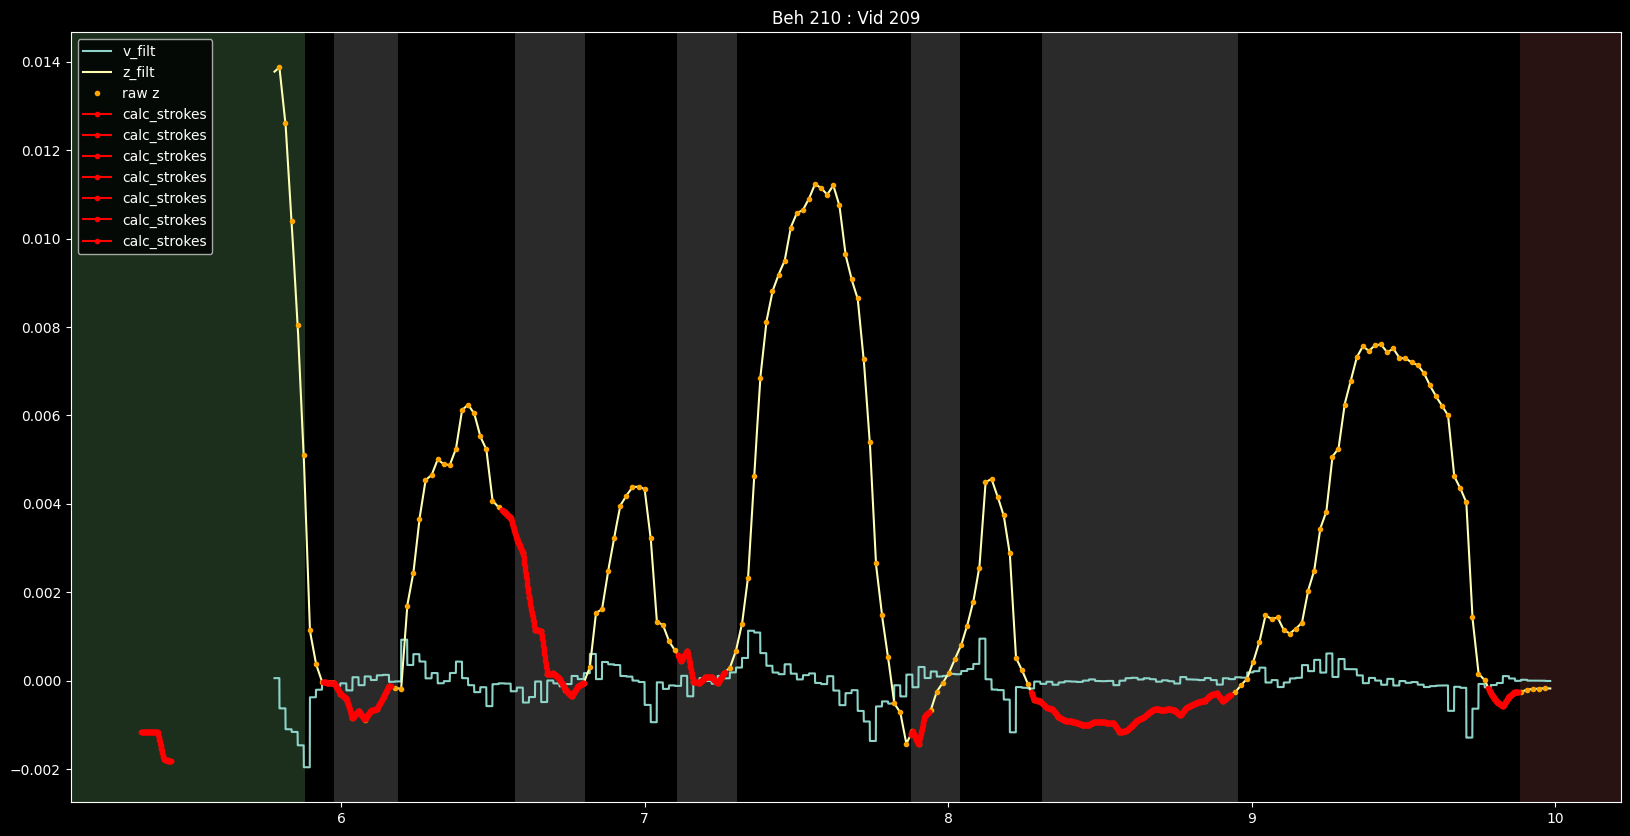

In [249]:
plotTrialsTrajectories(fd,ht_dat,trial_ml2=210)

In [49]:
D.grammarparses_successbinary_score_wrapper()  

*** RUNNING D.preprocessGood using these params:
['remove_baseline']
-- Len of D, before applying this param: remove_baseline, ... 755
after: 755
Defined new column: epochset
.. Appended new column 'char_seq', version: task_matlab
Defined new column: epochset
... merge_sets_with_only_single_epoch... 
('llCV3',) only has one epoch!:  ['llCV3']
Mergin these epochset's .. 
[('llCV3',)]
Into this new epochset: ('LEFTOVER',)
.. Appended new column 'char_seq', version: task_matlab
Defined new column: epochset
... merge_sets_with_only_single_epoch... 
('llCV3',) only has one epoch!:  ['llCV3']
Mergin these epochset's .. 
[('llCV3',)]
Into this new epochset: ('LEFTOVER',)
Assinging to column: self.Dat[taskfeat_cat]
*** RUNNING D.preprocessGood using these params:
['remove_baseline']
-- Len of D, before applying this param: remove_baseline, ... 755
after: 755
trial # 0
trial # 100
trial # 200
trial # 300
trial # 400
trial # 500
trial # 600
trial # 700
n samples for conjunctions of score_name, a

In [ ]:
#Fun little bonus columns
D.trialcode_tuple_extract_assign()
D.grammarparses_chunk_transitions_gaps_extract_batch()

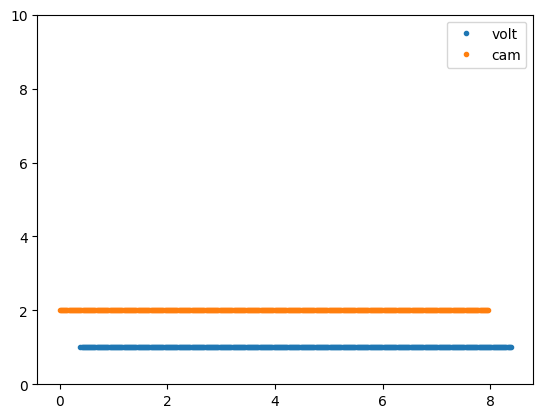

In [22]:
import pickle
import matplotlib.pyplot as plt
import numpy as np

with open('/home/danhan/freiwaldDrive/dhanuska/volt_times.pkl','rb') as f:
    volt_times = pickle.load(f)
with open('/home/danhan/freiwaldDrive/dhanuska/cam_times.pkl','rb') as f:
    cam_times = pickle.load(f)
volt_times = volt_times[2:]
cam_times = cam_times - np.min(cam_times)
volt_y = [1 for p in volt_times]
cam_y = [2 for p in cam_times]



plt.plot(volt_times,volt_y,'.',label='volt')
plt.plot(cam_times,cam_y,'.',label='cam')
plt.ylim(0,10)
plt.legend()
